| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* We want to demonstrate to the team why sample size is an important factor if you want to articulate performance issues. For the STATS 250 subpolot **only**, take a random sample of 100 student grades and overlay its corresponding t-distribution (with the same mean and standard deviation parameters as the normal distribution).


In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import regex as re
import numpy as np
import scipy.stats as stats

raw_data = pd.read_csv('./assets/assets/class_grades.csv', header=0, index_col=0)
conversion= {'A+':4.3,'A':4.0, 'A-': 3.7, 'B+': 3.3, 'B':3.0, 'B-':2.7, 'C+': 2.3, 'C': 2.0, 'C-':1.7, 'D+':1.3, 'D':1.0, 'D-':.7, 'E': 0.0}
column_names = raw_data.columns.values.tolist()

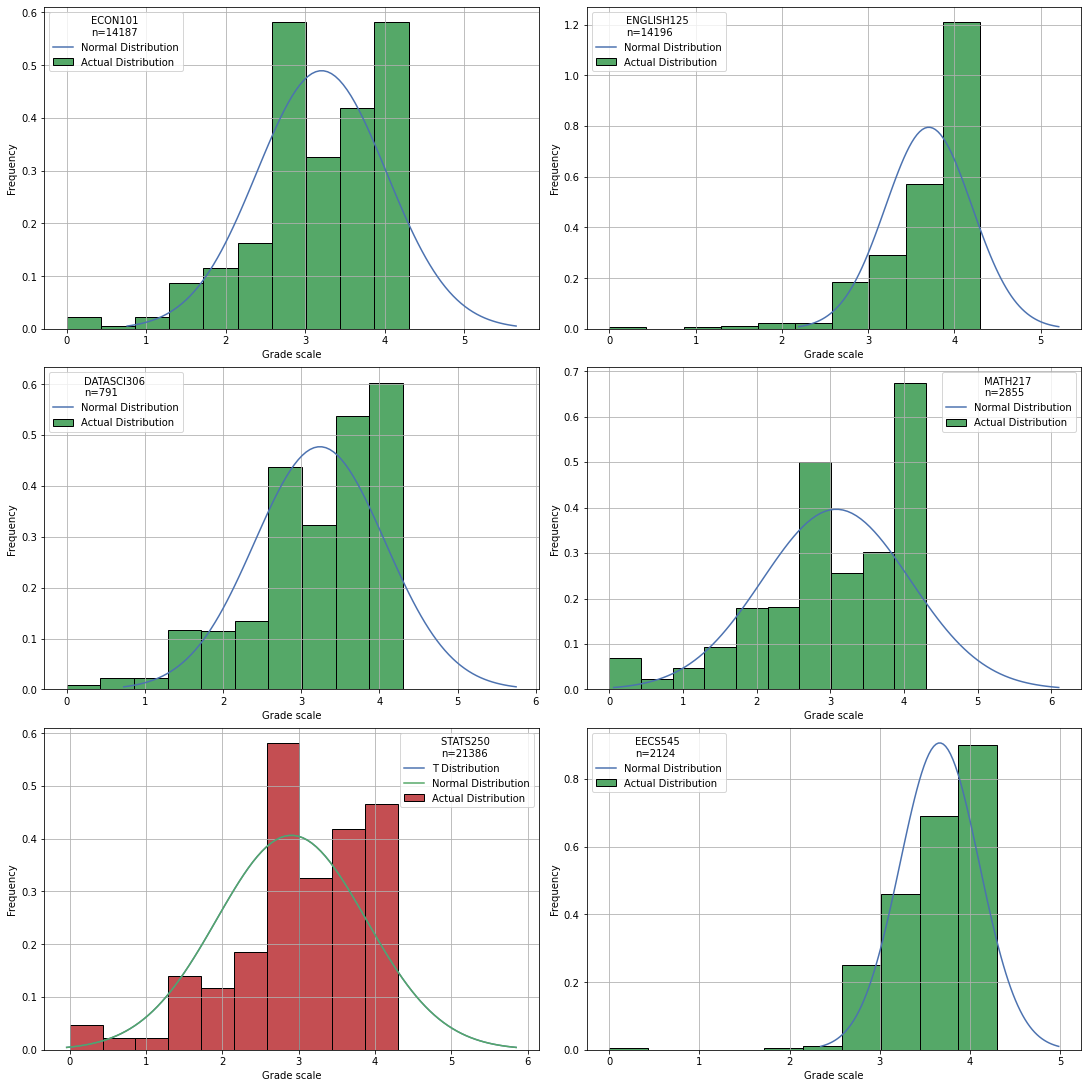

In [87]:
def grade_distribution():
    scale_grades = raw_data.replace(conversion)
    plt.style.use('seaborn-deep')
    fig, axs = plt.subplots(3, 2,figsize=(15, 15),constrained_layout = True)
    grid =[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
    regex= r'\w+(?=_grade)'
    
    i=0
    while i < len(column_names):
        column_name = column_names[i]
        class_name = re.search(regex,column_name).group()
        class_data = scale_grades[column_name].dropna()
        title = '{} \nn={}'.format(class_name,len(class_data))
        x, y = grid[i]
        axis = axs[x,y]
        mean = np.mean(class_data)
        sd = np.std(class_data)
        x = np.linspace(mean - 3*sd, mean + 3*sd, 100)

        
        if column_name == 'STATS250_grade':
            sample = class_data.sample(n=100)
            mean = np.mean(sample)
            sd = np.std(sample)
            x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
            axis.plot(x, stats.norm.pdf(x,mean,sd), label='T Distribution')

        axis.plot(x, stats.norm.pdf(x,mean,sd), label='Normal Distribution')
        class_data.hist(ax=axis,bins=10, label='Actual Distribution', density=True, edgecolor='black')
        axis.set(xlabel='Grade scale', ylabel='Frequency',label='Actual Distribution')
        axis.legend(title=title)
        
        i += 1
    
  
    return 

grade_distribution()


* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, mark observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution).  You may use the annotate tool inside the graph to circle each such instance or design some other manner to call out these points.
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

/Users/greynox/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
No handles with labels found to put in legend.
/Users/greynox/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
No handles with labels found to put in legend.
/Users/greynox/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
No handles with labels found to put 

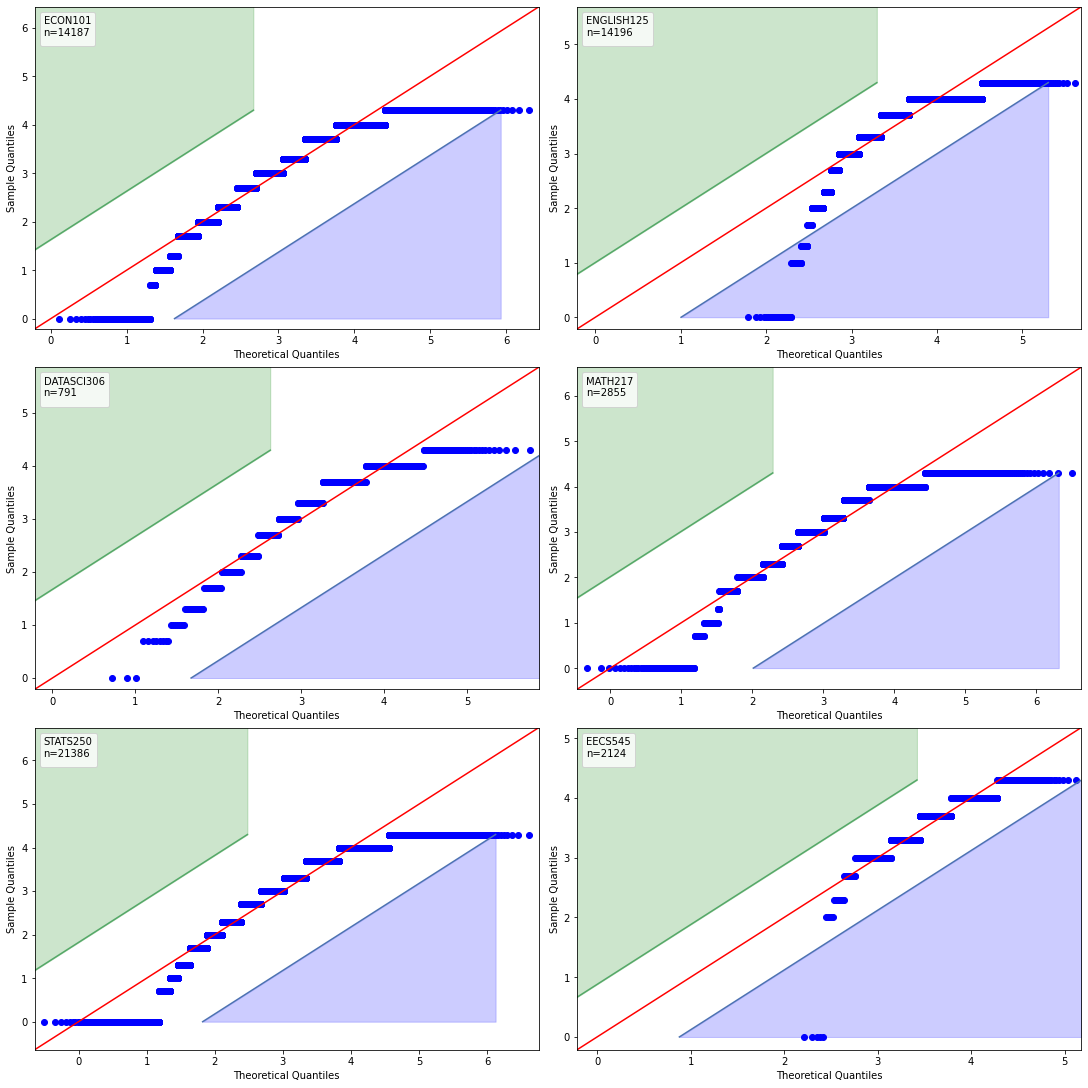

In [88]:
import statsmodels.api as sm

def grade_normality():

    scale_grades = raw_data.replace(conversion)
    plt.style.use('seaborn-deep')
    fig, axs = plt.subplots(3, 2,figsize=(15, 15),constrained_layout = True)
    grid =[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)] 
    regex= r'\w+(?=_grade)'
    
    i=0
    while i < len(column_names):
        column_name = column_names[i]
        class_name = re.search(regex,column_name).group()
        class_data = scale_grades[column_name].dropna()
        title = '{}\nn={}'.format(class_name,len(class_data))
        x, y = grid[i]
        axis = axs[x,y]
        mean = np.mean(class_data)
        sd = np.std(class_data)
        asc_data =class_data.sort_values(ascending=True)
        
        sm.qqplot(asc_data, stats.norm, loc=mean,scale=sd, line="45", ax=axis)
        axis.plot(asc_data+(2*sd),asc_data) #what the heck is happening with the end of the line
        axis.plot(asc_data-(2*sd),asc_data)
        axis.fill_between(asc_data+(2*sd), 0, asc_data, color='blue', alpha=.2)
        axis.fill_between(asc_data-(2*sd),asc_data,10, color='green', alpha=.2)
        axis.legend(title=title)
        i += 1
    

#ECON101 is not normal since there is a heavy tailed at the top
#ENGLISH125 is not normal since there is a gap in values
#DATASCI306 look fairly uniform and points are withing two standard deviations
#MATH217 looks heavy on the tails
#STATS250 is heavy on both tails but there aren't major gaps of breaks from the red line. could be close to normal
#EECS2545 has large gaps toward the bottom, that dosent seem to be normal

grade_normality()